In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
# 数据预处理
train = pd.read_csv('./train.csv')  #训练集
test = pd.read_csv('./test.csv')  #测试集

train.shape, test.shape

((891, 12), (418, 11))

In [80]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [81]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [82]:
dataset = train.append(test, sort=False)  #合并后的数据，方便一起清洗
dataset.tail()

/var/folders/z3/35dch6f55ljb9p9mlp9ybnsw0000gn/T/ipykernel_76722/1188491635.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = train.append(test, sort=False)  #合并后的数据，方便一起清洗


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


<BarContainer object of 98 artists>

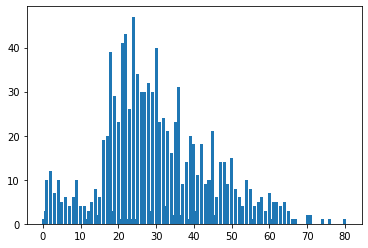

In [83]:
age = dataset.Age.value_counts()
plt.bar(age.index, age.values)

<BarContainer object of 99 artists>

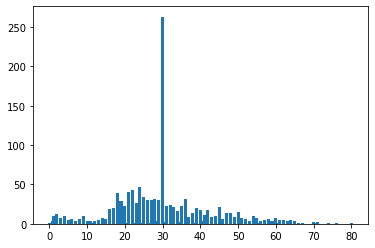

In [84]:
dataset.Age = dataset.Age.fillna(dataset.Age.mean())

age = dataset.Age.value_counts()
plt.bar(age.index,age.values)

<BarContainer object of 186 artists>

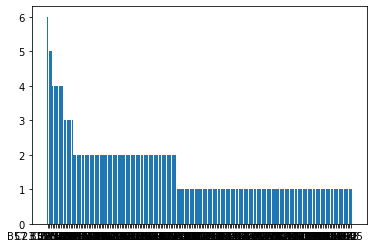

In [85]:
cabin = dataset.Cabin.value_counts()
plt.bar(cabin.index,cabin.values)

<BarContainer object of 9 artists>

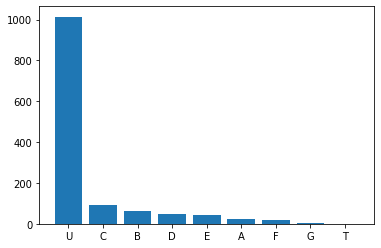

In [86]:
dataset.Cabin = dataset.Cabin.fillna('U') ## 先填充，否则apply无法处理N/A
dataset.Cabin=dataset.Cabin.apply(lambda x: x[0])

## 检查一下
cabin = dataset.Cabin.value_counts()
plt.bar(cabin.index,cabin.values)

<BarContainer object of 3 artists>

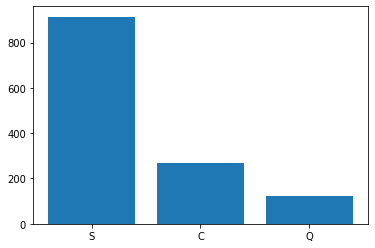

In [87]:
embarked = dataset.Embarked.value_counts()
plt.bar(embarked.index,embarked.values)

<BarContainer object of 3 artists>

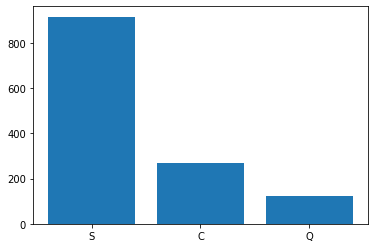

In [88]:
dataset.Embarked = dataset.Embarked.fillna('S')
embarked = dataset.Embarked.value_counts()
plt.bar(embarked.index,embarked.values)

<BarContainer object of 281 artists>

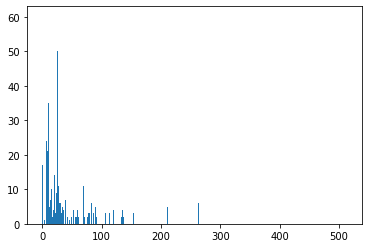

In [89]:
fare = dataset.Fare.value_counts()
plt.bar(fare.index,fare.values)

<BarContainer object of 282 artists>

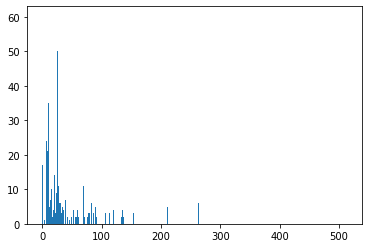

In [90]:
dataset.Fare = dataset.Fare.fillna(dataset.Fare.mean())
fare = dataset.Fare.value_counts()
plt.bar(fare.index,fare.values)

In [91]:
# 数据分析与特征构造
sexdict = {'male':1, 'female':0}
dataset.Sex = dataset.Sex.map(sexdict)

In [92]:
embarked2 = pd.get_dummies(dataset.Embarked, prefix = 'Embarked')

dataset = pd.concat([dataset,embarked2], axis = 1) ## 将编码好的数据添加到原数据上
dataset.drop(['Embarked'], axis = 1, inplace=True) ## 过河拆桥

dataset.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.25,U,0,0,1


In [93]:
cabin2 = pd.get_dummies(dataset.Cabin, prefix = 'Cabin')

dataset = pd.concat([dataset,cabin2], axis = 1)
dataset.drop(['Cabin'], axis = 1, inplace=True)

dataset.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.25,...,1,0,0,0,0,0,0,0,0,1


In [94]:
pclass = pd.get_dummies(dataset.Pclass, prefix = 'Pclass')

dataset = pd.concat([dataset,pclass], axis = 1)
dataset.drop(['Pclass'], axis = 1, inplace=True)

dataset.head(1)

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,...,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Pclass_1,Pclass_2,Pclass_3
0,1,0.0,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.25,0,...,0,0,0,0,0,0,1,0,0,1


In [95]:
## 头衔映射表
titleDict = {
    "Capt":       "Officer",
    "Col":        "Officer",
    "Major":      "Officer",
    "Jonkheer":   "Royalty",
    "Don":        "Royalty",
    "Sir" :       "Royalty",
    "Dr":         "Officer",
    "Rev":        "Officer",
    "the Countess":"Royalty",
    "Dona":       "Royalty",
    "Mme":        "Mrs",
    "Mlle":       "Miss",
    "Ms":         "Mrs",
    "Mr" :        "Mr",
    "Mrs" :       "Mrs",
    "Miss" :      "Miss",
    "Master" :    "Master",
    "Lady" :      "Royalty"
}
dataset.Name = dataset.Name.apply(lambda x:x.split(',')[1].split('.')[0].strip())
dataset.Name = dataset.Name.map(titleDict)
dataset.Name

0           Mr
1          Mrs
2         Miss
3          Mrs
4           Mr
        ...   
413         Mr
414    Royalty
415         Mr
416         Mr
417     Master
Name: Name, Length: 1309, dtype: object

In [96]:
title = pd.get_dummies(dataset.Name, prefix = 'title')

dataset = pd.concat([dataset,title], axis = 1) ## 将编码好的数据添加到原数据上
dataset.drop(['Name'], axis = 1, inplace=True) ## 过河拆桥

dataset.head(1)

,PassengerId,Survived,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,...,Cabin_U,Pclass_1,Pclass_2,Pclass_3,title_Master,title_Miss,title_Mr,title_Mrs,title_Officer,title_Royalty
0,1,0.0,1,22.0,1,0,A/5 21171,7.25,0,0,...,1,0,0,1,0,0,1,0,0,0


In [97]:
dataset['family']=dataset.SibSp+dataset.Parch+1

dataset.head(1)

,PassengerId,Survived,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,...,Pclass_1,Pclass_2,Pclass_3,title_Master,title_Miss,title_Mr,title_Mrs,title_Officer,title_Royalty,family
0,1,0.0,1,22.0,1,0,A/5 21171,7.25,0,0,...,0,0,1,0,0,1,0,0,0,2


In [98]:
dataset.drop(['Ticket'], axis = 1, inplace=True)

dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    1309 non-null   int64  
 1   Survived       891 non-null    float64
 2   Sex            1309 non-null   int64  
 3   Age            1309 non-null   float64
 4   SibSp          1309 non-null   int64  
 5   Parch          1309 non-null   int64  
 6   Fare           1309 non-null   float64
 7   Embarked_C     1309 non-null   uint8  
 8   Embarked_Q     1309 non-null   uint8  
 9   Embarked_S     1309 non-null   uint8  
 10  Cabin_A        1309 non-null   uint8  
 11  Cabin_B        1309 non-null   uint8  
 12  Cabin_C        1309 non-null   uint8  
 13  Cabin_D        1309 non-null   uint8  
 14  Cabin_E        1309 non-null   uint8  
 15  Cabin_F        1309 non-null   uint8  
 16  Cabin_G        1309 non-null   uint8  
 17  Cabin_T        1309 non-null   uint8  
 18  Cabin_U  

In [99]:
x_train = dataset.iloc[0:891, :]
y_train = x_train.Survived
x_train.drop(['Survived'], axis=1, inplace =True)

x_test = dataset.iloc[891:, :]
x_test.drop(['Survived'], axis=1, inplace =True)

y_test = pd.read_csv('./ground_truth.csv')#测试集
y_test=np.squeeze(y_test)

x_train.shape,y_train.shape,x_test.shape, y_test.shape

/var/folders/z3/35dch6f55ljb9p9mlp9ybnsw0000gn/T/ipykernel_76722/3854607562.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train.drop(['Survived'], axis=1, inplace =True)
/var/folders/z3/35dch6f55ljb9p9mlp9ybnsw0000gn/T/ipykernel_76722/3854607562.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test.drop(['Survived'], axis=1, inplace =True)


((891, 28), (891,), (418, 28), (418, 2))

In [100]:
corr = dataset.corr()
corr

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,...,Pclass_1,Pclass_2,Pclass_3,title_Master,title_Miss,title_Mr,title_Mrs,title_Officer,title_Royalty,family
PassengerId,1.000000,-0.005007,0.013406,0.025731,-0.055224,0.008942,0.031416,0.048101,0.011585,-0.049836,...,0.026495,0.022714,-0.041544,0.002254,-0.050027,0.014116,0.033299,0.002231,0.004400,-0.031437
Survived,-0.005007,1.000000,-0.543351,-0.070323,-0.035322,0.081629,0.257307,0.168240,0.003650,-0.149683,...,0.285904,0.093349,-0.322308,0.085221,0.332795,-0.549199,0.344935,-0.031316,0.033391,0.016639
Sex,0.013406,-0.543351,1.000000,0.057397,-0.109609,-0.213125,-0.185484,-0.066564,-0.088651,0.115193,...,-0.107371,-0.028862,0.116562,0.164375,-0.672819,0.870678,-0.571176,0.087288,-0.020408,-0.188583
Age,0.025731,-0.070323,0.057397,1.000000,-0.190747,-0.130872,0.171521,0.076179,-0.012718,-0.059153,...,0.362587,-0.014193,-0.302093,-0.363923,-0.254146,0.165476,0.198091,0.162818,0.059466,-0.196996
SibSp,-0.055224,-0.035322,-0.109609,-0.190747,1.000000,0.373587,0.160224,-0.048396,-0.048678,0.073709,...,-0.034256,-0.052419,0.072610,0.329171,0.077564,-0.243104,0.061643,-0.013813,-0.010787,0.861952
Parch,0.008942,0.081629,-0.213125,-0.130872,0.373587,1.000000,0.221522,-0.008635,-0.100943,0.071881,...,-0.013033,-0.010057,0.019521,0.253482,0.066473,-0.304780,0.213491,-0.032631,-0.030197,0.792296
Fare,0.031416,0.257307,-0.185484,0.171521,0.160224,0.221522,1.000000,0.286241,-0.130054,-0.169894,...,0.599956,-0.121372,-0.419616,0.011596,0.092051,-0.192192,0.139235,0.028696,0.026214,0.226465
Embarked_C,0.048101,0.168240,-0.066564,0.076179,-0.048396,-0.008635,0.286241,1.000000,-0.164166,-0.778262,...,0.325722,-0.134675,-0.171430,-0.014172,-0.014351,-0.065538,0.098379,0.003678,0.077213,-0.036553
Embarked_Q,0.011585,0.003650,-0.088651,-0.012718,-0.048678,-0.100943,-0.130054,-0.164166,1.000000,-0.491656,...,-0.166101,-0.121973,0.243706,-0.009091,0.198804,-0.080224,-0.100374,-0.003212,-0.021853,-0.087190
Embarked_S,-0.049836,-0.149683,0.115193,-0.059153,0.073709,0.071881,-0.169894,-0.778262,-0.491656,1.000000,...,-0.181800,0.196532,-0.003805,0.018297,-0.113886,0.108924,-0.022950,-0.001202,-0.054250,0.087771


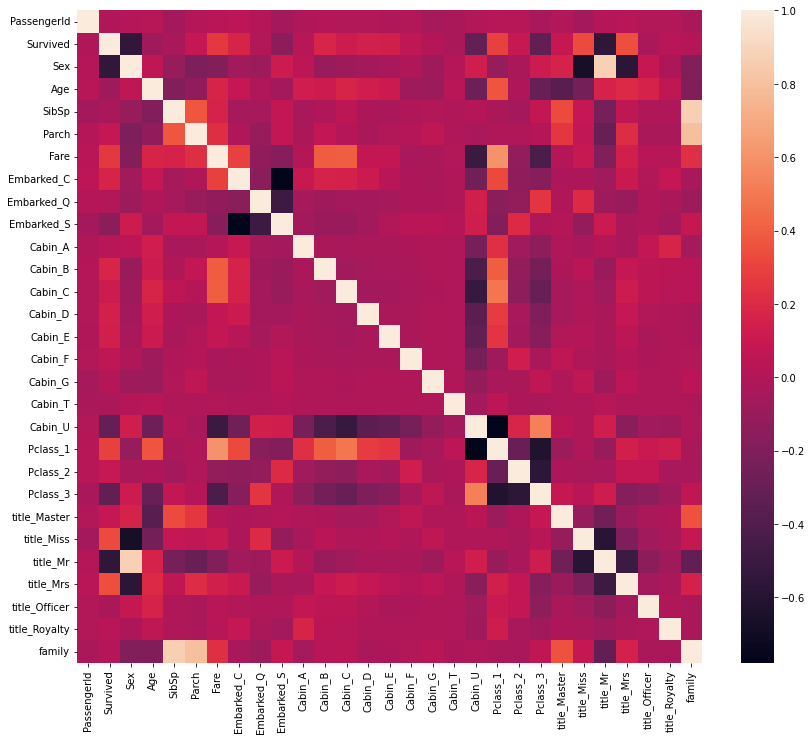

In [101]:
plt.figure(figsize=(14,12))
sns.heatmap(corr)
plt.show()

In [102]:
predictors = ['Sex','Age', 'Fare', 'title_Miss', 'title_Mr', 'title_Mrs', 'Pclass_1']

In [103]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [104]:
model.fit(x_train[predictors].iloc[0:-100,:],y_train.iloc[0:-100])

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [105]:
from sklearn.metrics import accuracy_score
accuracy_score(model.predict(x_train[predictors].iloc[-100:,:]),y_train.iloc[-100:].values.reshape(-1, 1))

0.77

In [106]:
y_train.iloc[-100:].values

array([0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1.,
       0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.])

In [107]:
y_train.iloc[-100:].values.reshape(-1, 1)

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],

In [108]:
model2 = LogisticRegression()
model2.fit(x_train.iloc[0:-100,:],y_train.iloc[0:-100])

accuracy_score(model2.predict(x_train.iloc[-100:,:]),y_train.iloc[-100:].values)

/usr/local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.87

In [109]:
# 输出前15重要的特征
pd.concat((pd.DataFrame(x_train.columns, columns = ['variable']),
           pd.DataFrame(abs(model2.coef_[0]), columns = ['importance'])),
          axis = 1).sort_values(by='importance', ascending = False)[:15]

# ['Sex','Age', 'Fare', 'title_Miss', 'title_Mr', 'title_Mrs', 'Pclass_1']

,variable,importance
23,title_Mr,1.372093
24,title_Mrs,1.112636
18,Pclass_1,1.041311
21,title_Master,0.901771
1,Sex,0.792900
22,title_Miss,0.727276
6,Embarked_C,0.661260
19,Pclass_2,0.610291
13,Cabin_E,0.569682
20,Pclass_3,0.556697
